##### Feature Selection using LASSO

In [19]:
from sklearn import datasets
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [20]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test=train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [21]:
X1_train.shape

(614, 8)

In [22]:
X1_test.shape

(154, 8)

In [23]:
from sklearn.preprocessing import StandardScaler
cols=X1_train.columns
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X1_train)
X_test_scaled=scaler.transform(X1_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)


In [24]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [25]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y1_train)

Lasso(alpha=0.1)

In [26]:
lasso.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

<Axes: >

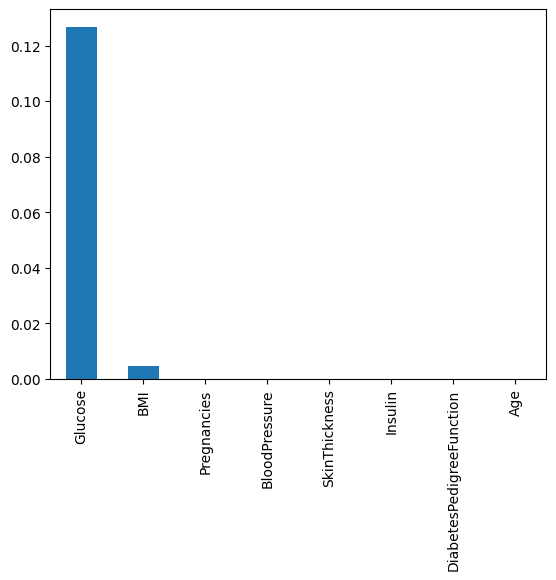

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)
x.sort_values(ascending=False).plot(kind='bar')

##### Feature Selection using Decision Tree

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [32]:
X2_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [33]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

#dt.fit(X_train,y_train)
rf.fit(X2_train,y2_train)

RandomForestClassifier()

In [34]:
rf.feature_importances_

array([0.08502958, 0.26720647, 0.09027642, 0.06981286, 0.07569441,
       0.16397851, 0.12146433, 0.12653742])

<Axes: >

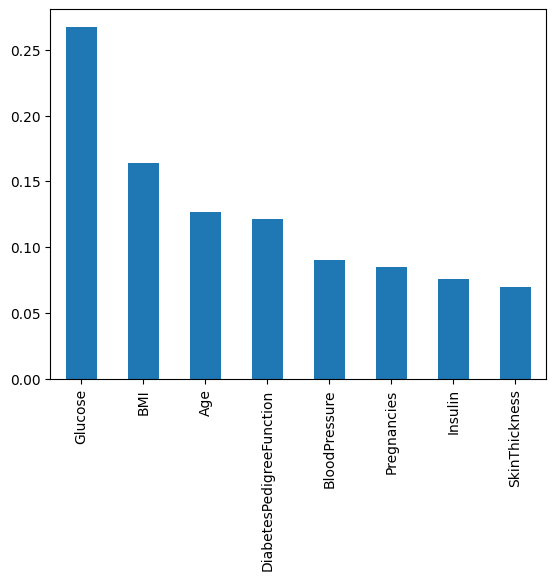

In [35]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)
x.sort_values(ascending=False).plot(kind='bar')

##### SelectFromModel

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [38]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model, threshold='mean')

In [39]:
sfm.fit(X3_train, y3_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [40]:
sfm.get_support(indices=True)

array([1, 5, 7], dtype=int64)

In [41]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [42]:
X_train_trans = sfm.transform(X3_train)
X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])
X_train_trans

,Glucose,BMI,Age
0,145.0,37.9,40.0
1,129.0,41.2,38.0
2,102.0,37.2,45.0
3,120.0,25.0,64.0
4,120.0,39.7,29.0
...,...,...,...
609,157.0,39.4,30.0
610,187.0,33.9,34.0
611,126.0,43.4,42.0
612,171.0,43.6,26.0


##### Recursive Feature Selection

In [43]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [46]:
X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [48]:
rf.feature_importances_

array([0.10866026, 0.02489004, 0.41606825, 0.45038144])

In [49]:
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [50]:
rf = RandomForestClassifier()
rf.fit(X,y)
rf.feature_importances_

array([0.21208983, 0.37221779, 0.41569238])

In [51]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [52]:
rf = RandomForestClassifier()
rf.fit(X,y)
rf.feature_importances_

array([0.43431693, 0.56568307])

In [53]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


##### Sklearn RFE

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")

Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 2
petal_width: 1


##### Mutual Info

In [56]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)

In [57]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob

B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [60]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i} :- Mutual Information = {mi_value}")

Feature 0 :- Mutual Information = 0.5138575102369374
Feature 1 :- Mutual Information = 0.2964781659280764
Feature 2 :- Mutual Information = 0.9847871459840465
Feature 3 :- Mutual Information = 0.9821114896025076


In [61]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]
